In [100]:
%matplotlib inline

import dateutil.parser
import datetime
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.contrib import learn

from pymongo import MongoClient
from bson.objectid import ObjectId

from sklearn.metrics import mean_squared_error

from lstm import lstm_model
from data_processing import generate_data, load_csvdata

In [101]:
LOG_DIR = './ops_logs/new_stock4'
TIMESTEPS = 1
RNN_LAYERS = [{'num_units': 5}]
DENSE_LAYERS = [10, 10]
TRAINING_STEPS = 100000
BATCH_SIZE = 1
PRINT_STEPS = TRAINING_STEPS / 100

In [102]:
def load_stock_frame(filename):
    data_raw = pd.read_csv(filename, dtype={'TIME': str})
    #data_raw['MEANALL'] = data_raw['MEANALL'].astype(float)
    #data_raw['MEANSP'] = data_raw['MEANSP'].astype(float)
    data_raw['STOCK'] = data_raw['STOCK'].astype(float)
    times = []
    for index, row in data_raw.iterrows():
        _t = datetime.datetime.strptime(row['TIME'], "%y%m%d")
        times.append(_t)
        
    data_raw['_time'] = pd.Series(times, index=data_raw.index)
    #df = pd.DataFrame(data_raw, columns=['TIME', 'MEANALL'])
    #df = pd.DataFrame(data_raw, columns=['TIME', 'MEANSP'])
    df = pd.DataFrame(data_raw, columns=['TIME', 'STOCK'])
    return df.set_index('TIME')

In [103]:
data_stock = load_stock_frame("mydata/Forprediction3.csv")
X, y = load_csvdata(data_stock, TIMESTEPS, seperate=False)

In [104]:
regressor = learn.SKCompat(learn.Estimator(
    model_fn=lstm_model(
        TIMESTEPS,
        RNN_LAYERS,
        DENSE_LAYERS
    ),
    model_dir=LOG_DIR
))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f88b37f2d10>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}


In [105]:
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                     every_n_steps=PRINT_STEPS,
                                                     early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'],
             monitors=[validation_monitor],
             batch_size=BATCH_SIZE,
             steps=TRAINING_STEPS)

predicted = regressor.predict(X['test'])

Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.
Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./ops_logs/new_stock4/model.ckpt.
INFO:tensorflow:loss = 2485.17, step = 1
INFO:tensorflow:global_step/sec: 952.191
INFO:tensorflow:loss = 1.81742, step = 101 (0.106 sec)
INFO:tensorflow:global_step/sec: 1057.06
INFO:tensorflow:loss = 2.08627, step = 201 (0.095 sec)
INFO:tensorflow:global_step/sec: 950.245
INFO:tensorflow:loss = 0.2134, step = 301 (0.105 sec)
INFO:tensorflow:global_step/sec: 936.049
INFO:tensorflow:loss = 6.40189, step = 401 (0.107 sec)
INFO:tensorflow:global_step/sec: 975.41
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 892.975
INFO:tensorflow:loss = 0.0681507, step = 3801 (0.112 sec)
INFO:tensorflow:global_step/sec: 985.854
INFO:tensorflow:loss = 1.92458, step = 3901 (0.101 sec)
INFO:tensorflow:global_step/sec: 1017.12
INFO:tensorflow:loss = 2.44855, step = 4001 (0.098 sec)
INFO:tensorflow:global_step/sec: 1037.29
INFO:tensorflow:loss = 0.062604, step = 4101 (0.096 sec)
INFO:tensorflow:global_step/sec: 968.288
INFO:tensorflow:loss = 0.31953, step = 4201 (0.103 sec)
INFO:tensorflow:global_step/sec: 957.497
INFO:tensorflow:loss = 8.10131, step = 4301 (0.104 sec)
INFO:tensorflow:global_step/sec: 999.331
INFO:tensorflow:loss = 0.0460653, step = 4401 (0.100 sec)
INFO:tensorflow:global_step/sec: 958.496
INFO:tensorflow:loss = 1.68171, step = 4501 (0.104 sec)
INFO:tensorflow:global_step/sec: 1035.4
INFO:tensorflow:loss = 0.538329, step = 4601 (0.097 sec)
INFO:tensorflow:global_step/sec: 959.481
INFO:tensorflow:loss = 7.41774, step = 4701 (0.104 sec)
INFO:tensorflow:global_st

INFO:tensorflow:global_step/sec: 1019.81
INFO:tensorflow:loss = 0.136444, step = 12201 (0.098 sec)
INFO:tensorflow:global_step/sec: 965.029
INFO:tensorflow:loss = 0.205404, step = 12301 (0.104 sec)
INFO:tensorflow:global_step/sec: 969.893
INFO:tensorflow:loss = 20.448, step = 12401 (0.103 sec)
INFO:tensorflow:global_step/sec: 965.875
INFO:tensorflow:loss = 4.66865, step = 12501 (0.104 sec)
INFO:tensorflow:global_step/sec: 994.837
INFO:tensorflow:loss = 0.0337866, step = 12601 (0.101 sec)
INFO:tensorflow:global_step/sec: 1013.55
INFO:tensorflow:loss = 4.3012, step = 12701 (0.099 sec)
INFO:tensorflow:global_step/sec: 954.199
INFO:tensorflow:loss = 0.119237, step = 12801 (0.105 sec)
INFO:tensorflow:global_step/sec: 1043.14
INFO:tensorflow:loss = 0.0650362, step = 12901 (0.096 sec)
INFO:tensorflow:global_step/sec: 954.361
INFO:tensorflow:loss = 2.74075, step = 13001 (0.105 sec)
INFO:tensorflow:global_step/sec: 992.744
INFO:tensorflow:loss = 0.439283, step = 13101 (0.101 sec)
INFO:tensorflo

INFO:tensorflow:loss = 0.319996, step = 20501 (0.108 sec)
INFO:tensorflow:global_step/sec: 939.708
INFO:tensorflow:loss = 0.661055, step = 20601 (0.106 sec)
INFO:tensorflow:global_step/sec: 930.709
INFO:tensorflow:loss = 0.446307, step = 20701 (0.108 sec)
INFO:tensorflow:global_step/sec: 952.898
INFO:tensorflow:loss = 0.16003, step = 20801 (0.105 sec)
INFO:tensorflow:global_step/sec: 959.069
INFO:tensorflow:loss = 27.4788, step = 20901 (0.104 sec)
INFO:tensorflow:global_step/sec: 949.694
INFO:tensorflow:loss = 1.53734, step = 21001 (0.105 sec)
INFO:tensorflow:global_step/sec: 1015.61
INFO:tensorflow:loss = 0.00755505, step = 21101 (0.098 sec)
INFO:tensorflow:global_step/sec: 913.692
INFO:tensorflow:loss = 0.19031, step = 21201 (0.109 sec)
INFO:tensorflow:global_step/sec: 957.341
INFO:tensorflow:loss = 0.024797, step = 21301 (0.105 sec)
INFO:tensorflow:global_step/sec: 963.762
INFO:tensorflow:loss = 0.453114, step = 21401 (0.104 sec)
INFO:tensorflow:global_step/sec: 949.578
INFO:tensorf

INFO:tensorflow:loss = 0.845604, step = 28801 (0.120 sec)
INFO:tensorflow:global_step/sec: 896.893
INFO:tensorflow:loss = 0.34415, step = 28901 (0.112 sec)
INFO:tensorflow:global_step/sec: 904.372
INFO:tensorflow:loss = 0.0295089, step = 29001 (0.111 sec)
INFO:tensorflow:global_step/sec: 1037.92
INFO:tensorflow:loss = 0.193767, step = 29101 (0.096 sec)
INFO:tensorflow:global_step/sec: 1064.62
INFO:tensorflow:loss = 0.678211, step = 29201 (0.094 sec)
INFO:tensorflow:global_step/sec: 937.815
INFO:tensorflow:loss = 11.6344, step = 29301 (0.107 sec)
INFO:tensorflow:global_step/sec: 967.042
INFO:tensorflow:loss = 0.115039, step = 29401 (0.103 sec)
INFO:tensorflow:global_step/sec: 1050.08
INFO:tensorflow:loss = 1.87826, step = 29501 (0.095 sec)
INFO:tensorflow:global_step/sec: 962.705
INFO:tensorflow:loss = 3.24102, step = 29601 (0.104 sec)
INFO:tensorflow:global_step/sec: 913.201
INFO:tensorflow:loss = 7.42221, step = 29701 (0.109 sec)
INFO:tensorflow:global_step/sec: 950.598
INFO:tensorflo

INFO:tensorflow:global_step/sec: 825.858
INFO:tensorflow:loss = 13.5539, step = 37201 (0.121 sec)
INFO:tensorflow:global_step/sec: 1018.38
INFO:tensorflow:loss = 0.0811477, step = 37301 (0.098 sec)
INFO:tensorflow:global_step/sec: 1030.53
INFO:tensorflow:loss = 0.385923, step = 37401 (0.097 sec)
INFO:tensorflow:global_step/sec: 1008.66
INFO:tensorflow:loss = 0.0165633, step = 37501 (0.099 sec)
INFO:tensorflow:global_step/sec: 1056.41
INFO:tensorflow:loss = 0.0231355, step = 37601 (0.095 sec)
INFO:tensorflow:global_step/sec: 962.482
INFO:tensorflow:loss = 2.44784, step = 37701 (0.104 sec)
INFO:tensorflow:global_step/sec: 1022.91
INFO:tensorflow:loss = 6.51435, step = 37801 (0.098 sec)
INFO:tensorflow:global_step/sec: 1028.36
INFO:tensorflow:loss = 18.4423, step = 37901 (0.097 sec)
INFO:tensorflow:global_step/sec: 941.265
INFO:tensorflow:loss = 0.00121154, step = 38001 (0.106 sec)
INFO:tensorflow:global_step/sec: 930.684
INFO:tensorflow:loss = 0.380273, step = 38101 (0.107 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 878.333
INFO:tensorflow:loss = 0.735185, step = 45501 (0.114 sec)
INFO:tensorflow:global_step/sec: 935.648
INFO:tensorflow:loss = 1.76871, step = 45601 (0.107 sec)
INFO:tensorflow:global_step/sec: 970.495
INFO:tensorflow:loss = 23.6205, step = 45701 (0.103 sec)
INFO:tensorflow:global_step/sec: 955.577
INFO:tensorflow:loss = 1.62355, step = 45801 (0.105 sec)
INFO:tensorflow:global_step/sec: 928.099
INFO:tensorflow:loss = 0.178563, step = 45901 (0.108 sec)
INFO:tensorflow:global_step/sec: 880.995
INFO:tensorflow:loss = 0.183664, step = 46001 (0.114 sec)
INFO:tensorflow:global_step/sec: 934.885
INFO:tensorflow:loss = 0.210765, step = 46101 (0.107 sec)
INFO:tensorflow:global_step/sec: 942.331
INFO:tensorflow:loss = 0.265085, step = 46201 (0.106 sec)
INFO:tensorflow:global_step/sec: 1036.43
INFO:tensorflow:loss = 0.636902, step = 46301 (0.096 sec)
INFO:tensorflow:global_step/sec: 965.364
INFO:tensorflow:loss = 0.0219601, step = 46401 (0.105 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 997.297
INFO:tensorflow:loss = 0.797421, step = 53801 (0.100 sec)
INFO:tensorflow:global_step/sec: 953.953
INFO:tensorflow:loss = 2.25409, step = 53901 (0.105 sec)
INFO:tensorflow:global_step/sec: 1017.94
INFO:tensorflow:loss = 2.64646, step = 54001 (0.098 sec)
INFO:tensorflow:global_step/sec: 951.601
INFO:tensorflow:loss = 1.87155, step = 54101 (0.105 sec)
INFO:tensorflow:global_step/sec: 938.976
INFO:tensorflow:loss = 0.0202823, step = 54201 (0.106 sec)
INFO:tensorflow:global_step/sec: 944.991
INFO:tensorflow:loss = 0.0393999, step = 54301 (0.106 sec)
INFO:tensorflow:global_step/sec: 973.143
INFO:tensorflow:loss = 7.31169, step = 54401 (0.103 sec)
INFO:tensorflow:global_step/sec: 946.377
INFO:tensorflow:loss = 0.027782, step = 54501 (0.106 sec)
INFO:tensorflow:global_step/sec: 1007.5
INFO:tensorflow:loss = 3.32186, step = 54601 (0.099 sec)
INFO:tensorflow:global_step/sec: 1025.56
INFO:tensorflow:loss = 5.35763, step = 54701 (0.098 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 989.834
INFO:tensorflow:loss = 0.0402885, step = 62101 (0.101 sec)
INFO:tensorflow:global_step/sec: 969.696
INFO:tensorflow:loss = 0.160082, step = 62201 (0.103 sec)
INFO:tensorflow:global_step/sec: 953.854
INFO:tensorflow:loss = 12.3133, step = 62301 (0.105 sec)
INFO:tensorflow:global_step/sec: 1017.43
INFO:tensorflow:loss = 3.01073, step = 62401 (0.098 sec)
INFO:tensorflow:global_step/sec: 954.236
INFO:tensorflow:loss = 0.289816, step = 62501 (0.105 sec)
INFO:tensorflow:global_step/sec: 950.346
INFO:tensorflow:loss = 0.295466, step = 62601 (0.105 sec)
INFO:tensorflow:global_step/sec: 940.608
INFO:tensorflow:loss = 36.2609, step = 62701 (0.106 sec)
INFO:tensorflow:global_step/sec: 940.726
INFO:tensorflow:loss = 24.9766, step = 62801 (0.106 sec)
INFO:tensorflow:global_step/sec: 949.251
INFO:tensorflow:loss = 0.632331, step = 62901 (0.105 sec)
INFO:tensorflow:global_step/sec: 1026.01
INFO:tensorflow:loss = 25.6672, step = 63001 (0.098 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 882.941
INFO:tensorflow:loss = 14.1931, step = 70401 (0.113 sec)
INFO:tensorflow:global_step/sec: 974.744
INFO:tensorflow:loss = 27.8657, step = 70501 (0.103 sec)
INFO:tensorflow:global_step/sec: 966.08
INFO:tensorflow:loss = 0.34379, step = 70601 (0.104 sec)
INFO:tensorflow:global_step/sec: 944.538
INFO:tensorflow:loss = 0.703209, step = 70701 (0.106 sec)
INFO:tensorflow:global_step/sec: 890.679
INFO:tensorflow:loss = 0.00205136, step = 70801 (0.112 sec)
INFO:tensorflow:global_step/sec: 922.527
INFO:tensorflow:loss = 0.51498, step = 70901 (0.108 sec)
INFO:tensorflow:global_step/sec: 941.149
INFO:tensorflow:loss = 0.891641, step = 71001 (0.106 sec)
INFO:tensorflow:global_step/sec: 963.382
INFO:tensorflow:loss = 0.00253572, step = 71101 (0.104 sec)
INFO:tensorflow:global_step/sec: 1054.27
INFO:tensorflow:loss = 0.362709, step = 71201 (0.095 sec)
INFO:tensorflow:global_step/sec: 949.389
INFO:tensorflow:loss = 3.6207, step = 71301 (0.105 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 924.155
INFO:tensorflow:loss = 0.0966551, step = 78701 (0.108 sec)
INFO:tensorflow:global_step/sec: 970.046
INFO:tensorflow:loss = 0.822659, step = 78801 (0.103 sec)
INFO:tensorflow:global_step/sec: 954.407
INFO:tensorflow:loss = 0.0103856, step = 78901 (0.105 sec)
INFO:tensorflow:global_step/sec: 1000.37
INFO:tensorflow:loss = 1.2362, step = 79001 (0.100 sec)
INFO:tensorflow:global_step/sec: 949.713
INFO:tensorflow:loss = 0.458445, step = 79101 (0.105 sec)
INFO:tensorflow:global_step/sec: 949.576
INFO:tensorflow:loss = 0.94259, step = 79201 (0.105 sec)
INFO:tensorflow:global_step/sec: 1007.52
INFO:tensorflow:loss = 0.0836465, step = 79301 (0.099 sec)
INFO:tensorflow:global_step/sec: 938.359
INFO:tensorflow:loss = 5.64459e-05, step = 79401 (0.107 sec)
INFO:tensorflow:global_step/sec: 900.852
INFO:tensorflow:loss = 18.3948, step = 79501 (0.111 sec)
INFO:tensorflow:global_step/sec: 1045.38
INFO:tensorflow:loss = 0.000288488, step = 79601 (0.096 sec)
INFO:

INFO:tensorflow:global_step/sec: 879.639
INFO:tensorflow:loss = 0.0610626, step = 87001 (0.114 sec)
INFO:tensorflow:global_step/sec: 970.639
INFO:tensorflow:loss = 5.44139, step = 87101 (0.103 sec)
INFO:tensorflow:global_step/sec: 971.95
INFO:tensorflow:loss = 0.173099, step = 87201 (0.103 sec)
INFO:tensorflow:global_step/sec: 963.652
INFO:tensorflow:loss = 0.00116682, step = 87301 (0.104 sec)
INFO:tensorflow:global_step/sec: 947.66
INFO:tensorflow:loss = 0.00914121, step = 87401 (0.105 sec)
INFO:tensorflow:global_step/sec: 950.606
INFO:tensorflow:loss = 0.0355155, step = 87501 (0.105 sec)
INFO:tensorflow:global_step/sec: 993.562
INFO:tensorflow:loss = 7.76946, step = 87601 (0.101 sec)
INFO:tensorflow:global_step/sec: 943.325
INFO:tensorflow:loss = 0.0138319, step = 87701 (0.106 sec)
INFO:tensorflow:global_step/sec: 1019.87
INFO:tensorflow:loss = 9.48836, step = 87801 (0.098 sec)
INFO:tensorflow:global_step/sec: 970.129
INFO:tensorflow:loss = 0.0880963, step = 87901 (0.103 sec)
INFO:te

INFO:tensorflow:global_step/sec: 924.12
INFO:tensorflow:loss = 0.0121636, step = 95301 (0.108 sec)
INFO:tensorflow:global_step/sec: 950.075
INFO:tensorflow:loss = 0.0123863, step = 95401 (0.105 sec)
INFO:tensorflow:global_step/sec: 953.643
INFO:tensorflow:loss = 0.17196, step = 95501 (0.105 sec)
INFO:tensorflow:global_step/sec: 933.646
INFO:tensorflow:loss = 0.596752, step = 95601 (0.107 sec)
INFO:tensorflow:global_step/sec: 1033.53
INFO:tensorflow:loss = 0.30911, step = 95701 (0.097 sec)
INFO:tensorflow:global_step/sec: 954.279
INFO:tensorflow:loss = 0.297959, step = 95801 (0.105 sec)
INFO:tensorflow:global_step/sec: 973.692
INFO:tensorflow:loss = 1.61935, step = 95901 (0.103 sec)
INFO:tensorflow:global_step/sec: 937.549
INFO:tensorflow:loss = 0.284192, step = 96001 (0.107 sec)
INFO:tensorflow:global_step/sec: 1006.38
INFO:tensorflow:loss = 0.132073, step = 96101 (0.099 sec)
INFO:tensorflow:global_step/sec: 916.339
INFO:tensorflow:loss = 0.113186, step = 96201 (0.109 sec)
INFO:tensorf

In [106]:
rmse = np.sqrt(((predicted - y['test'])** 2).mean(axis=0))

score = mean_squared_error(predicted, y['test'])
print("MSE: %f" % score)

MSE: 2.688424


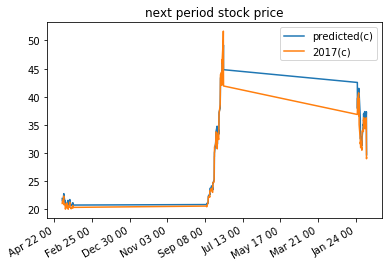

In [107]:
all_dates = data_stock.index.get_values()

fig, ax = plt.subplots(1)
fig.autofmt_xdate()

predicted_values = predicted.flatten()
predicted_dates = all_dates[len(all_dates)-len(predicted_values): len(all_dates)]
predicted_series = pd.Series(predicted_values, index=predicted_dates)
plot_predicted,= ax.plot(predicted_series, label='predicted(c)')

test_values = y['test'].flatten()
test_dates = all_dates[len(all_dates)- len(test_values):len(all_dates)]
test_series = pd.Series(test_values, index=test_dates)
plot_test, = ax.plot(test_series, label='2017(c)')

xfmt = mdates.DateFormatter('%b %d %H')
ax.xaxis.set_major_formatter(xfmt)

plt.title('next period stock price')
plt.legend(handles=[plot_predicted, plot_test])
plt.show()